In [84]:
import pandas as pd

In [85]:
df_ads= pd.read_csv('/Users/zheyiwang/Downloads/易速鲜花微信软文.csv')   
df_ads.head(10)

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


In [86]:
#导入数据可视化所需要的库
import matplotlib.pyplot as plt # Matplotlib – Python画图工具库
import seaborn as sns # Seaborn – 统计学数据可视化工具库

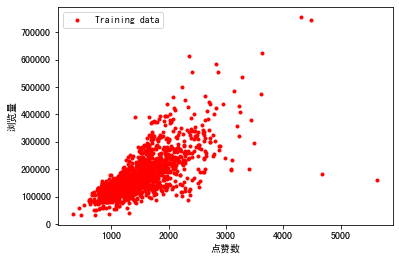

In [87]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.',label='Training data')
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

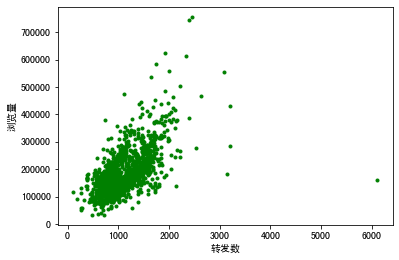

In [88]:
plt.plot(df_ads['转发数'],df_ads['浏览量'],'g.',label='Training data')
plt.xlabel('转发数')
plt.ylabel('浏览量')
plt.legend
plt.show

In [89]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
data.head()


,浏览量,热度指数
0,260004,7
1,100004,4
2,164502,6
3,163001,6
4,260401,7


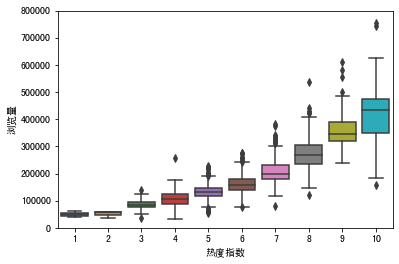

In [90]:
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

In [91]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

In [92]:
df_ads = df_ads.dropna() # 把出现了NaN的数据行删掉

In [93]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉标签相关字段

In [94]:
y = df_ads.浏览量 # 标签集

In [95]:
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [96]:
y.head() #显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

In [97]:
#将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split #导入train_test_split工具
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [98]:
from sklearn.linear_model import LinearRegression
linereg_model = LinearRegression()

In [99]:
linereg_model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = linereg_model.predict(X_test)

In [101]:
df_ads_pred = X_test.copy() # 测试集特征数据
df_ads_pred['浏览量真值'] = y_test # 测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred # 测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
1074,1709,970.0,6,5,130003,181499.180492
404,1440,1440.0,4,4,118005,122478.101604
1375,1434,1454.0,7,5,189003,214815.847941
1317,832,832.0,6,6,105504,137486.350468
145,923,876.0,5,5,119501,110710.382414
...,...,...,...,...,...,...
420,1790,873.0,7,5,193004,211755.243385
1338,2622,1463.0,8,5,325002,301982.291922
542,1342,1372.0,6,5,161502,177814.080182
311,1663,1364.0,4,6,256002,136460.539585


In [103]:
print('当前模型的4个特征的权重分别是: ', linereg_model.coef_)
print('当前模型的截距（偏置）是: ', linereg_model.intercept_)

当前模型的4个特征的权重分别是:  [   48.08395224    34.73062229 29730.13312489  2949.62196343]
当前模型的截距（偏置）是:  -127493.90606857173
